For Week 2 Time Series Forecasting Assignment, this problem of predicting water levels in aquifier was taken from Kaggle.
https://www.kaggle.com/competitions/acea-water-prediction



Waterbody: Petrignano
Description: The wells field of the alluvial plain between Ospedalicchio di Bastia Umbra and Petrignano is fed by three underground aquifers separated by low permeability septa. The aquifer can be considered a water table groundwater and is also fed by the Chiascio river. The groundwater levels are influenced by the following parameters: rainfall, depth to groundwater, temperatures and drainage volumes, level of the Chiascio river.
https://www.kaggle.com/code/andreshg/timeseries-analysis-a-complete-guide/notebook

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date 

In [ ]:
url='https://raw.githubusercontent.com/mandalnilabja/soc2022/main/data/Aquifer_Petrignano.csv'
df=pd.read_csv(url)
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [ ]:
df=df[df.Temperature_Bastia_Umbra.notna()].reset_index(drop=True) #Scanning dataset reveals lack of feature data for initial time and Temperature_Bastia_Umbra has null values like others and chosen arbitrarily

In [ ]:
df.columns = ['date', 'rainfall', 'depth_to_groundwater_P24', 'depth_to_groundwater_P25', 'temperature_B', 'temperature_P', 'drainage_volume', 'river_hydrometry'] #renaming to simplify
Y=df[['depth_to_groundwater_P24', 'depth_to_groundwater_P25']]
X=df.drop(['depth_to_groundwater_P24', 'depth_to_groundwater_P25'], axis=1)
df.head()

,date,rainfall,depth_to_groundwater_P24,depth_to_groundwater_P25,temperature_B,temperature_P,drainage_volume,river_hydrometry
0,01/01/2009,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
1,02/01/2009,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2,03/01/2009,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
3,04/01/2009,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3


In [ ]:
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df.head()

,date,rainfall,depth_to_groundwater_P24,depth_to_groundwater_P25,temperature_B,temperature_P,drainage_volume,river_hydrometry
0,2009-01-01,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
1,2009-01-02,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2,2009-01-03,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
3,2009-01-04,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3


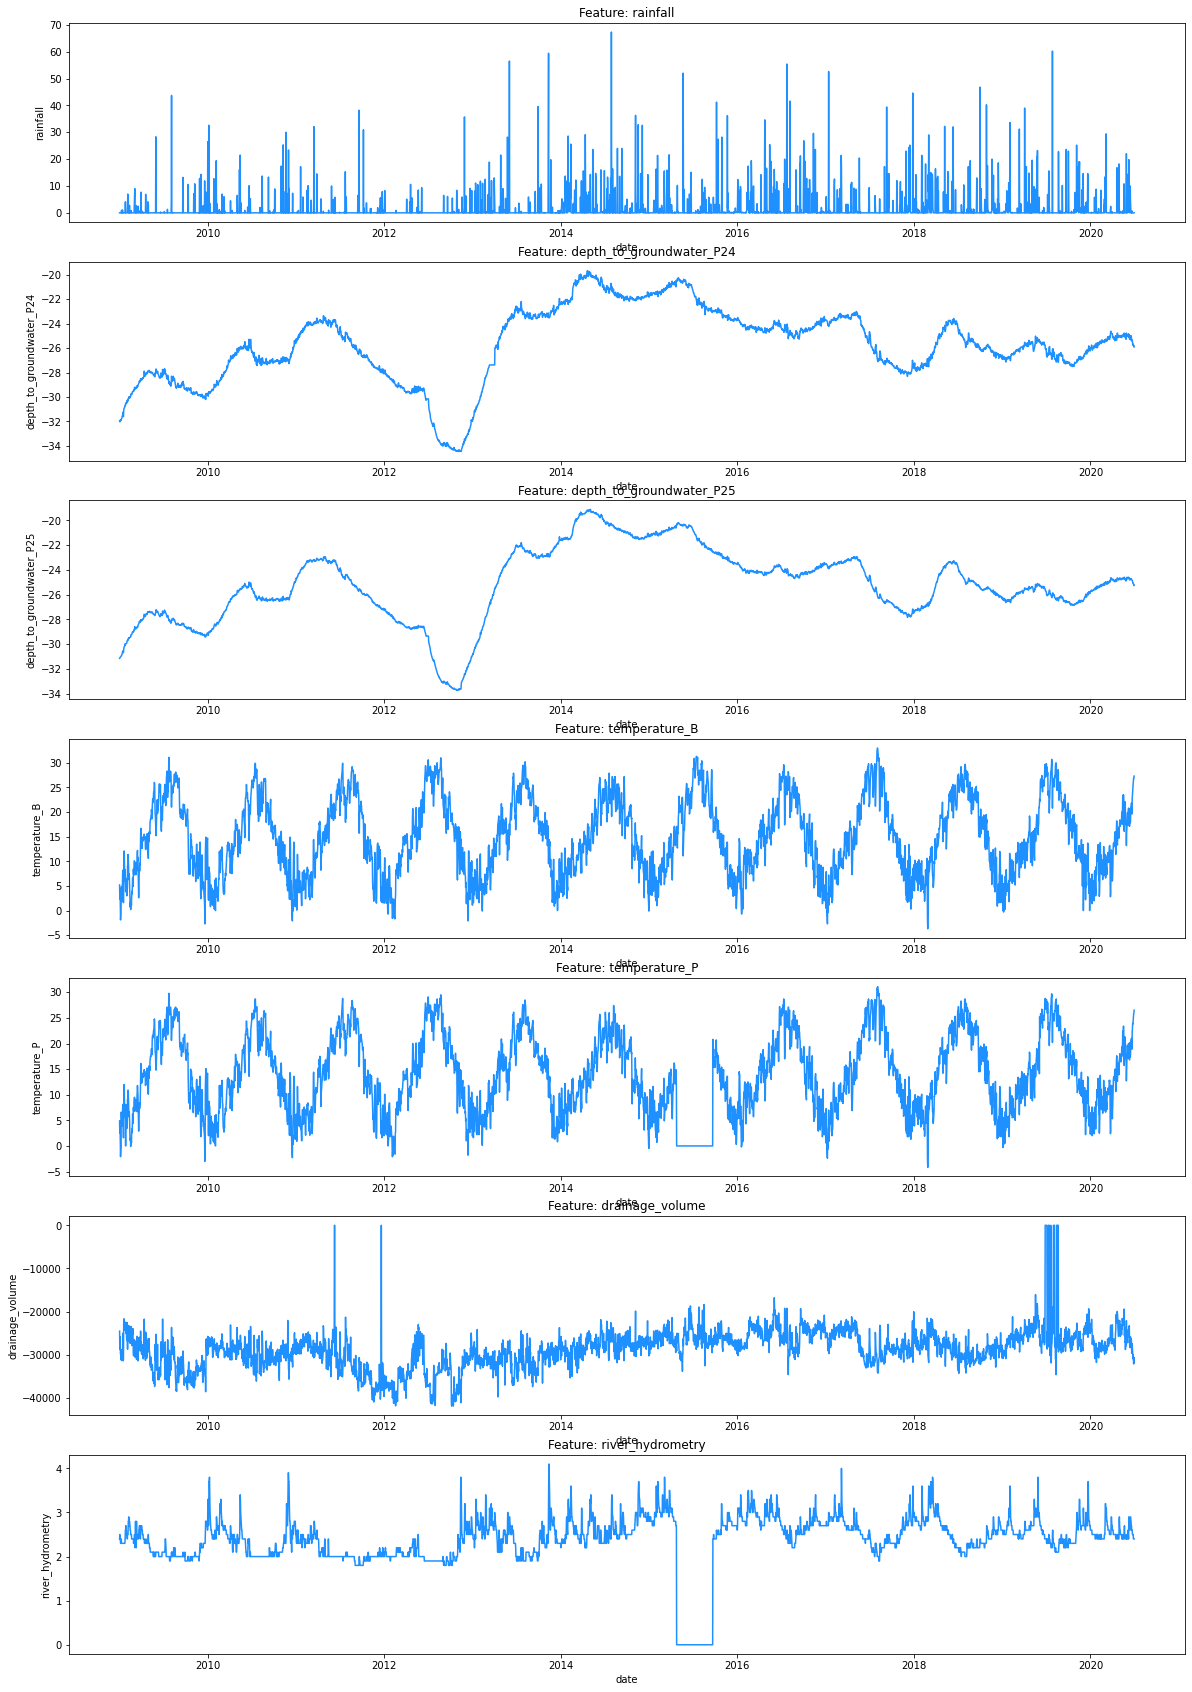

In [ ]:
f, ax = plt.subplots(nrows=7, ncols=1, figsize=(20, 30))

for i, column in enumerate(df.drop('date', axis=1).columns): #Plotting time vs features
    sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column))
    ax[i].set_ylabel(ylabel=column)


In [ ]:
df.isna().sum()

date                         0
rainfall                     0
depth_to_groundwater_P24    39
depth_to_groundwater_P25    27
temperature_B                0
temperature_P                0
drainage_volume              1
river_hydrometry             0
dtype: int64

In [ ]:
df['river_hydrometry'] = df['river_hydrometry'].replace(0, np.nan) #replacing 0 values which are obviously missing data
df['drainage_volume'] = df['drainage_volume'].replace(0, np.nan)
df['drainage_volume'] = df['drainage_volume'].interpolate() #interpolating missing data
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater_P24'] = df['depth_to_groundwater_P24'].interpolate()
df['depth_to_groundwater_P25'] = df['depth_to_groundwater_P25'].interpolate()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['depth_to_groundwater_P24'].values) #adfuller test to understand stationarity
result

(-2.533034587657005,
 0.1076421196440498,
 30,
 4168,
 {'1%': -3.431919897294544,
  '10%': -2.5671392595835743,
  '5%': -2.8622336943713442},
 -5657.7193916398155)

In [ ]:
result = adfuller(df['depth_to_groundwater_P25'].values) #adfuller test to understand stationarity
result

(-2.899836995568042,
 0.045366955953434034,
 28,
 4170,
 {'1%': -3.4319191438819407,
  '10%': -2.567139082403142,
  '5%': -2.8622333615468443},
 -11587.395288114172)

In [ ]:
def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']
    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

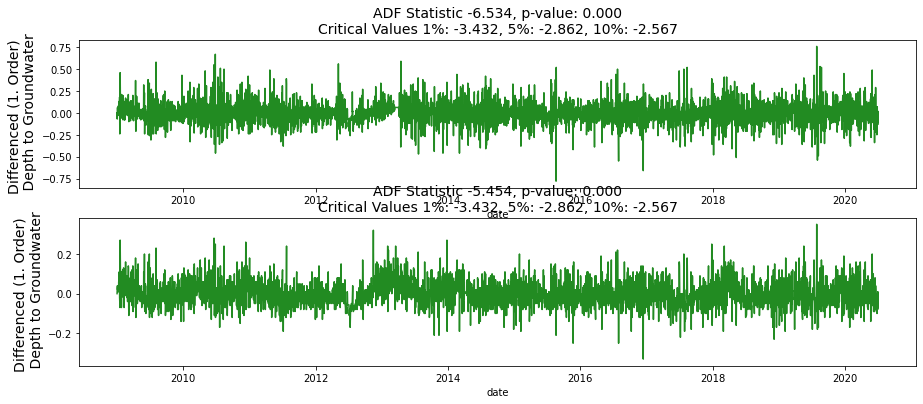

In [ ]:
# First Order Differencing
ts_diff1 = np.diff(df['depth_to_groundwater_P24'])
ts_diff2 = np.diff(df['depth_to_groundwater_P25'])
df['depth_to_groundwater_diff_1'] = np.append([0], ts_diff1)
df['depth_to_groundwater_diff_2'] = np.append([0], ts_diff2)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['depth_to_groundwater_diff_1'], 'Differenced (1. Order) \n Depth to Groundwater', ax[0])
visualize_adfuller_results(df['depth_to_groundwater_diff_2'], 'Differenced (1. Order) \n Depth to Groundwater', ax[1])

In [ ]:
result = adfuller(df['depth_to_groundwater_diff_1'].values) #adfuller test to understand stationarity
result

(-6.534171544449571,
 9.701711879000757e-09,
 29,
 4169,
 {'1%': -3.4319195204978277,
  '10%': -2.567139170972099,
  '5%': -2.8622335279191637},
 -5653.390262563173)

In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
from prophet import Prophet #Probhet is fb's powerful time series predictor
from colorama import Fore

Single Variate Prophet Forecasting

In [ ]:
#@title
X = df['date']
y = df['depth_to_groundwater_P24']

folds = TimeSeriesSplit(n_splits=2)
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['date', 'depth_to_groundwater_P24']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

3569 630


In [ ]:
#@title
# Train the model
model = Prophet()
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 2.0214899484329885


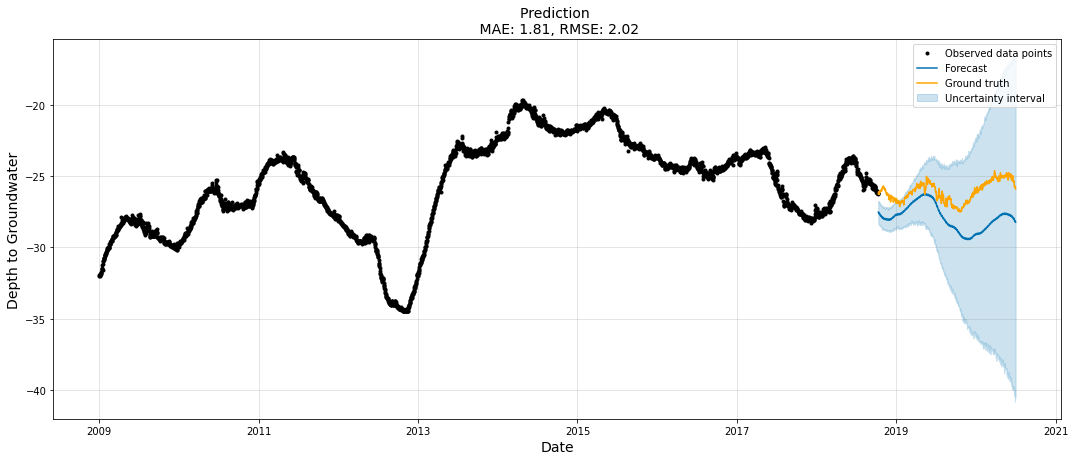

In [ ]:
#@title
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

In [ ]:
feature_columns = [
    'rainfall',
    'temperature_B',
    'temperature_P',
    'drainage_volume',
    'river_hydrometry',
]
target_column = ['depth_to_groundwater_P24']

train_size = int(0.85 * len(df)) #train test split 0.85:0.15

multivariate_df = df[['date'] + target_column + feature_columns].copy()
multivariate_df.columns = ['ds', 'y'] + feature_columns

train = multivariate_df.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4,5,6]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4,5,6]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

train.head()

,ds,y,rainfall,temperature_B,temperature_P,drainage_volume,river_hydrometry
0,2009-01-01,-31.96,0.0,5.2,4.9,-24530.688,2.4
1,2009-01-02,-32.03,0.0,2.3,2.5,-28785.888,2.5
2,2009-01-03,-31.97,0.0,4.4,3.9,-25766.208,2.4
3,2009-01-04,-31.91,0.0,0.8,0.8,-27919.296,2.4
4,2009-01-05,-31.94,0.0,-1.9,-2.1,-29854.656,2.3


In [ ]:
# Train the model
model = Prophet()
model.add_regressor('rainfall')
model.add_regressor('temperature_B')
model.add_regressor('temperature_P')
model.add_regressor('drainage_volume')
model.add_regressor('river_hydrometry')

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 1.7318412460276387


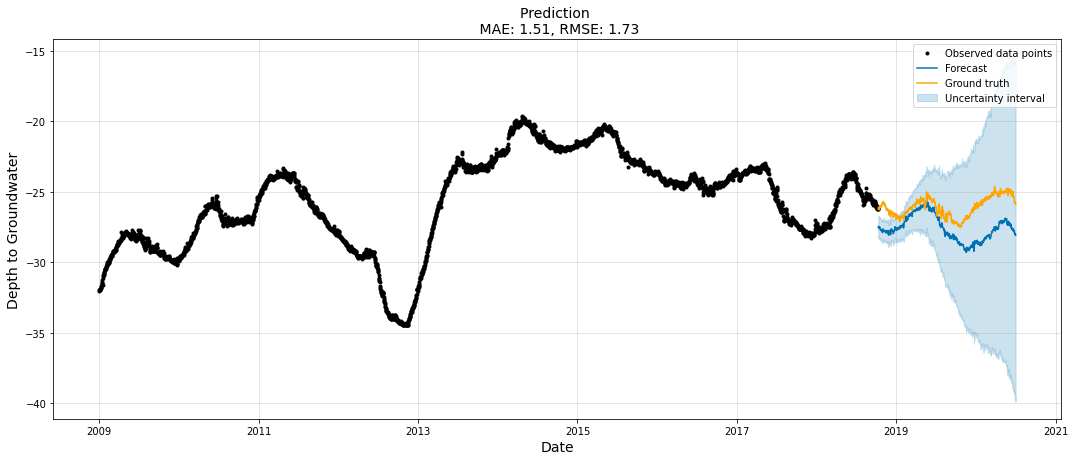

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

In [ ]:
feature_columns = [
    'rainfall',
    'temperature_B',
    'temperature_P',
    'drainage_volume',
    'river_hydrometry',
]
target_column = ['depth_to_groundwater_P25']

train_size = int(0.85 * len(df))

multivariate_df = df[['date'] + target_column + feature_columns].copy()
multivariate_df.columns = ['ds', 'y'] + feature_columns

train = multivariate_df.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4,5,6]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4,5,6]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

train.head()

,ds,y,rainfall,temperature_B,temperature_P,drainage_volume,river_hydrometry
0,2009-01-01,-31.14,0.0,5.2,4.9,-24530.688,2.4
1,2009-01-02,-31.11,0.0,2.3,2.5,-28785.888,2.5
2,2009-01-03,-31.07,0.0,4.4,3.9,-25766.208,2.4
3,2009-01-04,-31.05,0.0,0.8,0.8,-27919.296,2.4
4,2009-01-05,-31.01,0.0,-1.9,-2.1,-29854.656,2.3


In [ ]:
# Train the model
model2 = Prophet()
model2.add_regressor('rainfall')
model2.add_regressor('temperature_B')
model2.add_regressor('temperature_P')
model2.add_regressor('drainage_volume')
model2.add_regressor('river_hydrometry')

# Fit the model with train set
model2.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 2.0534611628577935


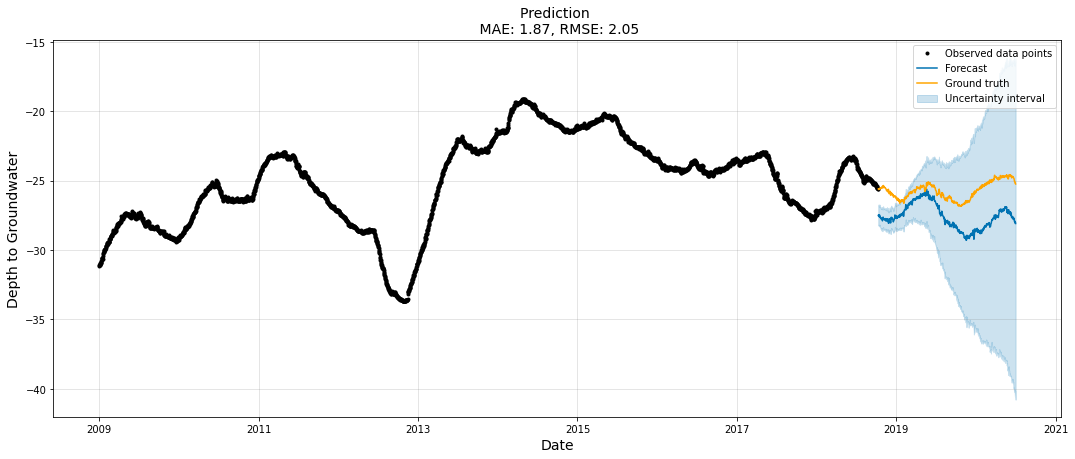

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model2.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()